# Gradient Boosting Classification

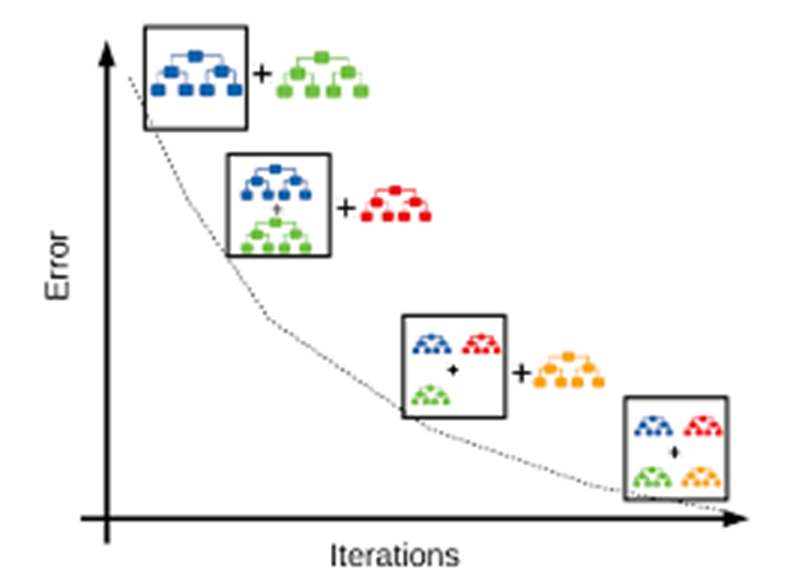

In [78]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read the train dataset

In [79]:
import pandas as pd
df= pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Check missing values in dataframe


In [81]:
m = df.isna().sum()
m

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

## Duplicates in Dataframe

In [83]:
df.duplicated().sum()

0

# Separate X and Y (Survived)

In [84]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [85]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [86]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Seperate cat and con features

In [87]:
cat =list(X.columns[X.dtypes=='object'])
con =list(X.columns[X.dtypes!='object'])

In [88]:
cat

['Sex', 'Embarked']

In [89]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Create a preprocessing pipeline for X

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [91]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])


In [92]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])

In [93]:
pre =ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [94]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked'])])

In [95]:
X_pre =pre.fit_transform(X)
X_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [96]:
cols =pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'], dtype=object)

In [97]:
X_pre =pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [98]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

# Train Test Split

In [99]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest = train_test_split(X_pre,Y,test_size=0.2, random_state=42)

In [100]:
xtrain.shape

(712, 10)

In [101]:
xtest.shape

(179, 10)

In [102]:
ytrain.value_counts()

Survived
0           444
1           268
Name: count, dtype: int64

In [103]:
ytest.value_counts()

Survived
0           105
1            74
Name: count, dtype: int64

# Create a Gradient Boosting Model 

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier(learning_rate=0.0001, n_estimators=1, max_depth=2 ,min_samples_split=5, min_samples_leaf=5)
model.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.0001, max_depth=2,
                           min_samples_leaf=5, min_samples_split=5,
                           n_estimators=1)

In [105]:
model.score(xtrain,ytrain)

0.6235955056179775

In [106]:
model.score(xtest,ytest)

0.5865921787709497

# Hyperparameter tuning with Randomised search cv

In [107]:
params = {'learning_rate':[0.01,0.05,0.1,0.2],
           'n_estimators':[10,50,100,200],
           'max_depth':[2,3,4,5,6,7],
           'min_sample_split':[5,6,7,8,9,10]}